# Master Thesis Research Framework

**Brandon Tchaka NIYUNGEKO**

### Thesis Subject
__*"Predictive Modelling of Credit Risk in Peer-to-Peer Lending: A Machine Learning Approach to Analysing Borrower Solvency*__


<div style="background-color: #E3F7FD; border-left: 5px solid #007bff; padding: 0.5em;">


### Objectives
The objectives of my thesis are as follows:
- **Identify and analyse key borrower and loan characteristics** that influence loan performance.
- **Construct predictive models** that outperform traditional credit scoring methods in accuracy and adaptability.
- **Evaluate the integration of economic indicators** into the credit scoring process to offer a more dynamic and holistic assessment of credit risk.
</div>

### Data Source and Acquisition

<div style="background-color: #E3F7FD; border-left: 5px solid #007bff; padding: 0.5em;">
    <strong>Data Overview:</strong>
    The research framework of this study leverages a comprehensive dataset that combines loan-level data from the Lending Club platform with state-level macroeconomic indicators. Lending Club, one of the pioneering and leading peer-to-peer lending platforms in the United States, provides a rich repository of loan and borrower characteristics spanning from 2008 to 2019. The dataset, which was made publicly available by the platform, consists of over 2.7 million loan observations with diverse features capturing loan terms, borrower profiles, and loan performance, the data covers USA-based loans.
    <br><br>
    To enhance the depth and relevance of the analysis, the loans data was augmented with state-specific economic and demographic variables of the state or locality in question. These variables were sourced from institutions such as the <em>U.S. Bureau of Labor Statistics, U.S. Census Bureau, Bureau of Economic Analysis (BEA),</em> and <em>World Development Indicators</em> from the World Bank databank. The integration of these macroeconomic indicators allows for a more comprehensive inspection of credit risk, considering not only individual borrower characteristics but also the broader economic context in which the loans are issued.
    <br><br>
    <strong>Data Article Reference:</strong> Nigmonov et al., 2021. <br>
    <strong>URL for Data Accessibility (as of May 29th, 2024):</strong> <a href="https://data.mendeley.com/datasets/wb3ndt69gf/3" target="_blank">https://data.mendeley.com/datasets/wb3ndt69gf/3</a>
</div>


In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.offline as pyo
import datetime as dt
from plotly.offline import iplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, RocCurveDisplay, PrecisionRecallDisplay
#!pip3 install imblearn --ignore-installed scikit-learn

In [5]:
# Loading the .dta file
df = pd.read_stata('../Mendeley - Fintech & Macroeconomics/P2P_Macro_Data.dta')

# Displaying the first few rows of the dataframe
df.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0      11875        11875          11875.0   36 months    0.1531   413.459991   
1      11500        11500          11500.0   36 months    0.1849   418.589996   
2       2300         2300           2300.0   36 months    0.0890    73.040001   
3      19600        19600          19600.0   36 months    0.1409   670.739990   
4       3900         3900           3900.0   36 months    0.1311   131.619995   

  grade sub_grade                    emp_title emp_length  ... loan_status_5  \
0     C        C2          North Slope Borough    2 years  ...             0   
1     D        D2          Ulmers Burgess, Inc     1 year  ...             0   
2     A        A5  Metlakatla Indian Community  10+ years  ...             0   
3     B        B5                         USAF    7 years  ...             6   
4     B        B4                      US Army    7 years  ...             6   

   meanopen_acc FED_lag6 riskprem loan_vol6m loglvol_6m  issue_daily  \
0          11.0     0.11   3.2075   321075.0  12.679430   2012-08-01   
1          11.0     0.11   3.2075   321075.0  12.679430   2012-08-01   
2          11.0     0.11   3.2075   192200.0  12.166292   2012-09-01   
3          11.0     0.09   3.2150   192200.0  12.166292   2012-09-01   
4          11.0     0.09   3.2150   192200.0  12.166292   2012-09-01   

  issue_year loan6m_median      loan_sum  
0     2012.0    17885976.0  4.162437e+10  
1     2012.0    17885976.0  4.162437e+10  
2     2012.0    17885976.0  4.162437e+10  
3     2012.0    17885976.0  4.162437e+10  
4     2012.0    17885976.0  4.162437e+10  

[5 rows x 195 columns]

In [8]:
# Creating a dictionary to hold the information about each column
def info_col(df):
    column_info = {}

    # Populating the dictionary with data type and unique value count for each column
    for col in df.columns:
        column_info[col] = {
            'Data type': df[col].dtype,
            'Number of unique values': df[col].nunique(),
            'Missing values' : df[col].isnull().sum()/df.shape[0]*100
        }
    return pd.DataFrame.from_dict(column_info, orient='index')

In [9]:
df.shape

(2703430, 195)

In [10]:
df_cols = info_col(df)

# Variables with missing values in descending order
df_cols.sort_values(by='Missing values', ascending=0).head(30) 

Data type  Number of unique values  \
verification_status_joint        float64                        0   
url                              float64                        0   
revol_bal_joint                  float64                    73688   
sec_app_open_act_il              float64                       41   
dti_joint                        float32                     4030   
annual_inc_joint                 float64                    25069   
mths_since_last_record           float64                      128   
lognum_accts_ever_120_pd         float32                       46   
mths_since_recent_bc_dlq         float64                      183   
mths_since_last_major_derog      float64                      188   
mths_since_recent_revol_delinq   float64                      185   
mths_since_last_delinq           float64                      179   
open_act_il                      float64                       59   
il_util                          float64                      310   
logpercent_bc_gt_75              float32                      298   
open_acc_6m                      float64                       19   
total_bal_il                     float64                   181669   
inq_fi                           float64                       34   
total_cu_tl                      float64                       65   
inq_last_12m                     float64                       49   
mths_since_recent_inq            float64                       26   
num_tl_120dpd_2m                 float64                        7   
logmo_sin_old_il_acct            float32                      586   
logmo_sin_rcnt_tl                float32                      234   
Muni                             float64                      196   
bc_util                          float32                     1504   
bc_open_to_buy                   float64                   100135   
mths_since_recent_bc             float64                      566   
revol_util                       float64                     1346   
logsocialnetworkuser             float32                       92   

                                Missing values  
verification_status_joint           100.000000  
url                                 100.000000  
revol_bal_joint                      93.467521  
sec_app_open_act_il                  93.467484  
dti_joint                            93.001335  
annual_inc_joint                     93.001187  
mths_since_last_record               84.858273  
lognum_accts_ever_120_pd             77.599753  
mths_since_recent_bc_dlq             77.012536  
mths_since_last_major_derog          74.371891  
mths_since_recent_revol_delinq       67.316520  
mths_since_last_delinq               51.878872  
open_act_il                          45.483515  
il_util                              39.498341  
logpercent_bc_gt_75                  30.145445  
open_acc_6m                          29.424842  
total_bal_il                         29.424842  
inq_fi                               29.424842  
total_cu_tl                          29.424842  
inq_last_12m                         29.424842  
mths_since_recent_inq                11.233988  
num_tl_120dpd_2m                      3.347007  
logmo_sin_old_il_acct                 3.037882  
logmo_sin_rcnt_tl                     1.581879  
Muni                                  1.419530  
bc_util                               1.175618  
bc_open_to_buy                        1.124830  
mths_since_recent_bc                  1.058211  
revol_util                            0.079935  
logsocialnetworkuser                  0.006029

In [7]:
# There are 21 variables with missing values > 10% 
len(df_cols[df_cols['Missing values'] > 10])

21

In [11]:
# Dropping all columns with more than 10% missing values
missing_value_percentage = df.isnull().mean() * 100
# Creating a mask for columns with more than 10% missing values
columns_to_drop = missing_value_percentage[missing_value_percentage > 10].index
df = df.drop(columns=columns_to_drop)

# EDA: Exploratory Data Analysis (with main variables)
- Total dataset variables: 195

In [64]:
#### SET 1 : We start with a set of variables among the 195 total variables for we have identified them as a better fit for a first iteration of model training

In [ ]:
info_col(df_fset1.iloc[:,:]).sort_values(by='Number of unique values', ascending=1).head(25)

<div style="background-color: #E3F7FD; border-left: 5px solid #007bff; padding: 0.5em;">

#### DEFINITION OF Delinquent LOAN __(dependend variable)__:

Dependent variable *(loan_status)*: Following Kim, et al (2018) [1], we define delinquent loans as:

- Late loans with 30+ or more days due and still incurring interest. 
- Default loans
- Charged Off
</div>

In [15]:
df[['badloan','loan_status',]].value_counts(normalize=True).sort_index()

badloan  loan_status       
0.0      Current               0.630626
         Fully Paid            0.283099
         In Grace Period       0.006146
1.0      Charged Off           0.065799
         Default               0.000045
         Late (16-30 days)     0.002778
         Late (31-120 days)    0.011506
dtype: float64

In [123]:
#Since loan_status 'Late (16-30 days)' is labelled as badloan = 1, we will change the label to 0 to make it consistent with our definition of badloan (see above)
df.loc[df['loan_status'] == 'Late (16-30 days)', 'badloan'] = 0

# For some cases and to better differentiate between the two classes, we will create a new column that does not account the 'Current' loan status

# mapping logic
conditions = [
    df['loan_status'].isin(['Fully Paid', 'In Grace Period']),  # Conditions for 0
    df['loan_status'].isin(['Late (31-120 days)', 'Default', 'Charged Off'])  # Conditions for 1
]

# Define the values to assign for each condition
values = [0, 1]

# Use np.select to apply these conditions and values
df['delinquent_target'] = np.select(conditions, values, default=np.nan)


__There are approx *92%* 'badloan' in our dataset :  1 if the loan is overdue for more than 30 days, defaulted or
charged-off and 0 otherwise (current or repaid)  *8%*__

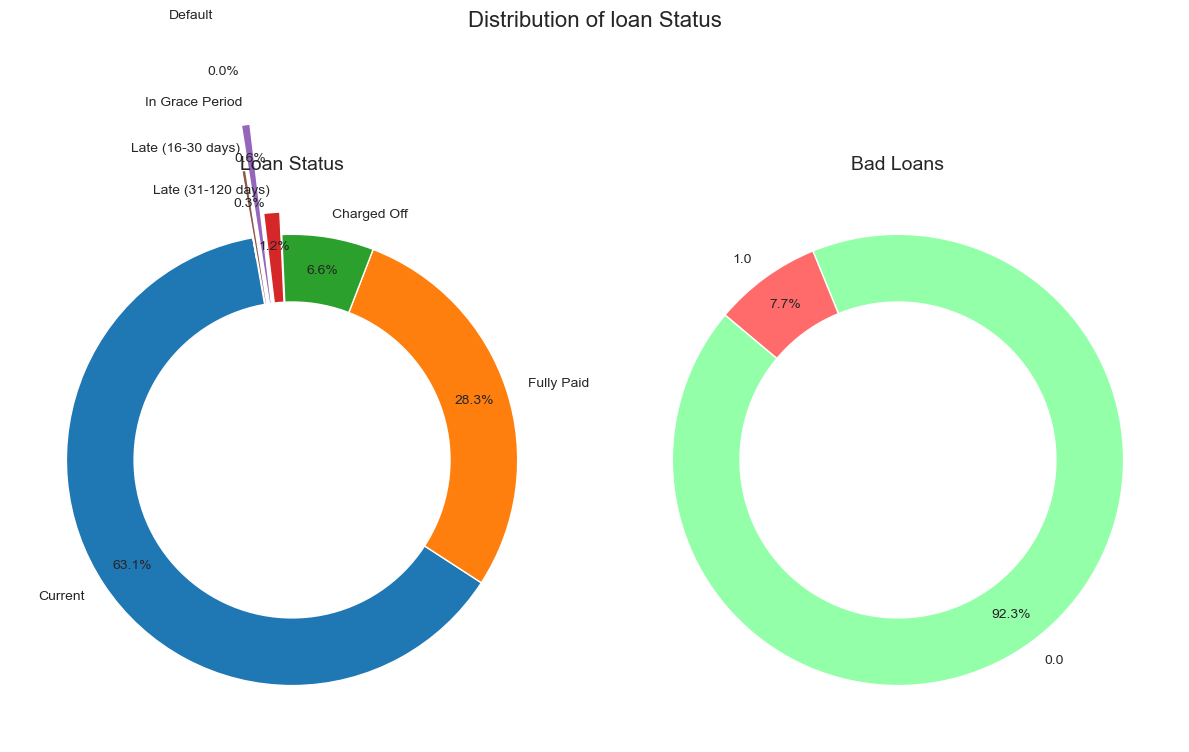

Proportion  Number of loans
badloan loan_status                                    
0.0     Current               0.630626          1704854
        Fully Paid            0.283099           765339
        In Grace Period       0.006146            16615
        Late (16-30 days)     0.002778             7510
1.0     Charged Off           0.065799           177884
        Late (31-120 days)    0.011506            31106
        Default               0.000045              122

In [66]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Pie Chart about loan_status
viz_counts = df['loan_status'].value_counts()
explode = (0, 0, 0, 0.1, 0.5, 0.3, 0.9)
axs[0].pie(viz_counts.values, labels=viz_counts.index, autopct='%1.1f%%', startangle=100, pctdistance=0.85, wedgeprops={'edgecolor': 'white'}, explode=explode)
axs[0].add_artist(plt.Circle((0, 0), 0.70, fc='white'))

# Pie Chart about badloan
badloan_counts = df['badloan'].value_counts()

# Create the donut chart
axs[1].pie(badloan_counts.values, labels=badloan_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=['#94FFA9', '#FF6B6B'])
# Set the center circle to create a donut chart
axs[1].add_artist(plt.Circle((0, 0), 0.70, fc='white'))

# titles 
axs[0].set_title('Loan Status', fontsize=14)
axs[1].set_title('Bad Loans', fontsize=14)
fig.suptitle('Distribution of loan Status', fontsize=16, y=1.02)


plt.tight_layout()
plt.show()

# Dataframe of values underneath donut charts to retrive visualized values
pd.DataFrame({'Proportion': df[['badloan', 'loan_status']].value_counts(normalize=True), 'Number of loans' : df[['badloan', 'loan_status']].value_counts()}).sort_values(by='badloan', ascending=True)

In [33]:
print(f"Current %:, {df[df['loan_status']=='Current'].shape[0] / df.shape[0] * 100}")
print(f"Fully Paid & In Grace Period %:, {df[df['loan_status'].isin(['Fully Paid','In Grace Period'])].shape[0] / df.shape[0] * 100}")
print(f"Delinquent %:, {df[df['loan_status'].isin(['Charged Off','Late (31-120 days', 'Default'])].shape[0] / df.shape[0] * 100}")

Current %:, 63.06262784684641
Fully Paid & In Grace Period %:, 28.924514413171416
Delinquent %:, 6.5844501244715055


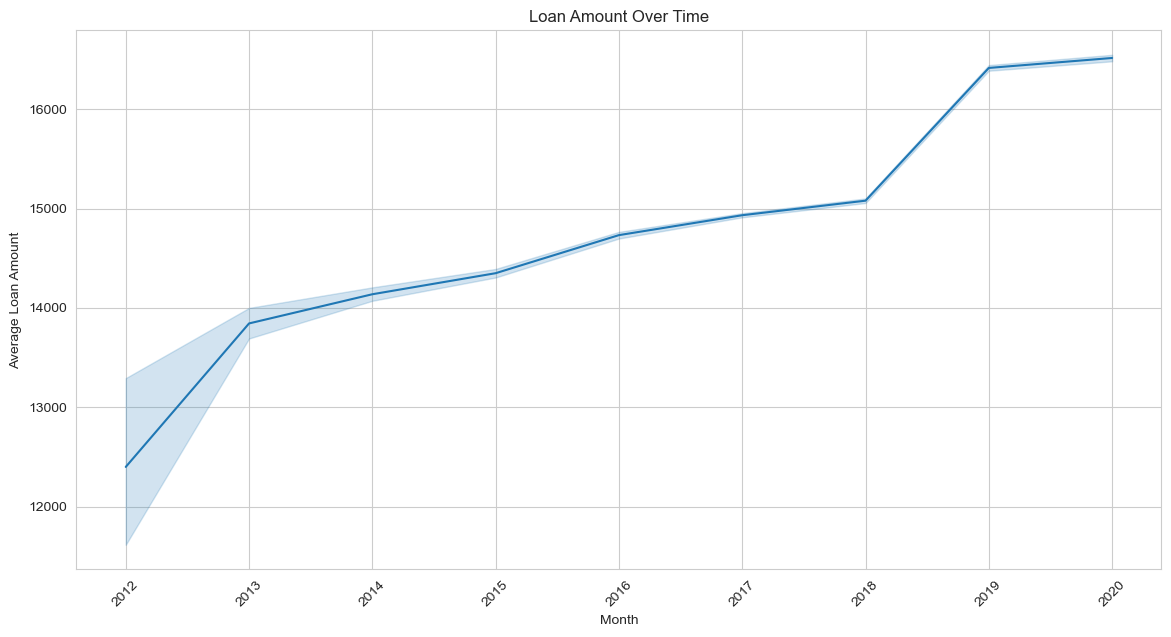

In [43]:
sns.set_style("whitegrid")

plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='year', y='loan_amnt')
plt.title('Loan Amount Over Time')
plt.xlabel('Month')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=45) 
plt.show()


Key Observations:

- Steady Increase: The average loan amount shows a steady increase from 2012, with a notable rise starting around mid-2015, continuing to climb until it levels off slightly in 2019.
- Sharp Increase: There is a sharp increase between 2019 and 2020. This abrupt rise could be indicative of changing economic conditions, changes in lending policies, or adjustments due to inflationary trends.
- Confidence Bands: The shaded area around the line, representing variability in the data, becomes narrower over time, suggesting increasing stability in the loan amounts being issued and less variability in the amounts borrowed each year.

#### - last_date_issue_difference : 
Let's consider a new variable, last_date_issue_difference, ==> To better grasp the time scale between issue date of loan and last loan event (especially for the defaulted ones) 

    - __==> In other words, how long does it take for the average loan to be defaulted ?__

In [48]:
from dateutil.relativedelta import relativedelta
# Creating last_date_issue_difference = 'last_date' - 'issue_daily' | 
df['last_date_issue_difference'] = df.apply(lambda row: (relativedelta(row['last_date'], row['issue_daily']).years * 12) + relativedelta(row['last_date'], row['issue_daily']).months, axis=1)
df[['issue_daily', 'last_date', 'last_date_issue_difference']]

issue_daily  last_date  last_date_issue_difference
0        2012-08-01 2015-09-01                          37
1        2012-08-01 2015-09-01                          37
2        2012-09-01 2015-09-01                          36
3        2012-09-01 2014-01-01                          16
4        2012-09-01 2014-06-01                          21
...             ...        ...                         ...
2703425  2019-12-01 2020-04-01                           4
2703426  2019-12-01 2020-04-01                           4
2703427  2019-12-01 2020-04-01                           4
2703428  2019-12-01 2020-04-01                           4
2703429  2019-12-01 2020-04-01                           4

[2703430 rows x 3 columns]

The average time for a loan to be defaulted is approximately 14.38 months.


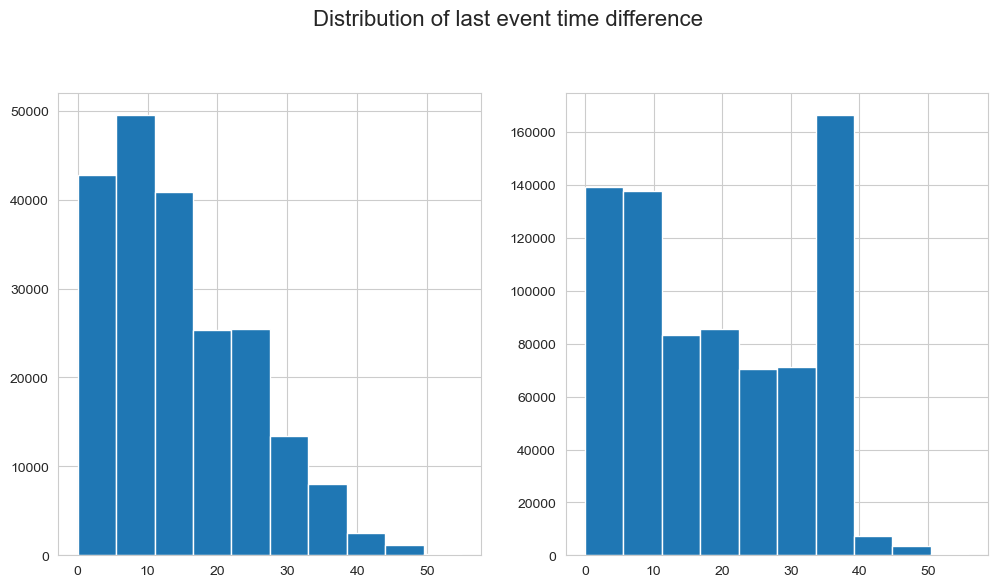

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].hist(df.loc[df.badloan == 1]['last_date_issue_difference'])
axs[1].hist(df.loc[df['loan_status_'].isin(['Fully Paid'])]['last_date_issue_difference']);
fig.suptitle('Distribution of last_event time difference', fontsize=16, y=1.02)

average_time_to_default = df.loc[df['badloan'] == 1, 'last_date_issue_difference'].mean()
print("The average time for a loan to be defaulted is approximately {:.2f} months.".format(average_time_to_default))

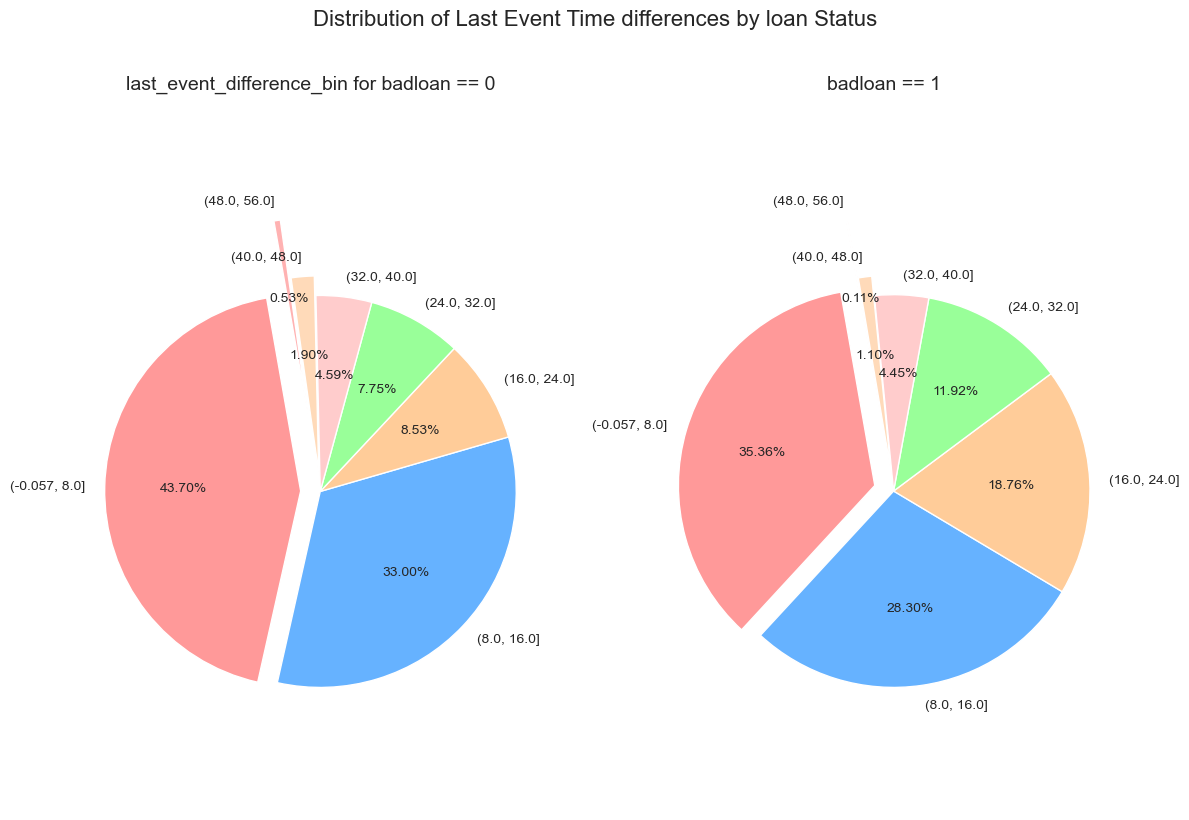

Badloan ==0  Badloan ==1
(-0.057, 8.0]     0.437047     0.353610
(8.0, 16.0]       0.330047     0.282973
(32.0, 40.0]      0.045885     0.187646
(24.0, 32.0]      0.077475     0.119214
(16.0, 24.0]      0.085311     0.044459
(40.0, 48.0]      0.018957     0.010956
(48.0, 56.0]      0.005277     0.001143

In [60]:
df['last_event_difference_bin'] = pd.cut(df['last_date_issue_difference'], bins=7, labels=df['last_date_issue_difference'].value_counts(bins=7).index)
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

colors = ['#FF9999', '#66B2FF', '#FFCC99', '#99FF99', '#FFCCCC', '#FFDAB9', '#FFB2B2']

explode = (0.1, 0, 0, 0, 0, 0.1, 0.4)
axs[0].pie(df.loc[df.badloan == 0]['last_event_difference_bin'].value_counts(), labels=df['last_event_difference_bin'].value_counts().index, autopct='%.2f%%', colors=colors, explode=explode, startangle=100)
axs[0].set_title('last_event_difference_bin for badloan == 0', fontsize=14)
axs[0].axis('equal')

axs[1].pie(df.loc[df.badloan == 1]['last_event_difference_bin'].value_counts(), labels=df['last_event_difference_bin'].value_counts().index, autopct='%.2f%%', colors=colors, explode=explode, startangle=100)
axs[1].set_title('badloan == 1', fontsize=14)
axs[1].axis('equal')
fig.suptitle('Distribution of Last Event Time differences by loan Status', fontsize=16, y=1.02)  # Adjust 'y' for spacing

plt.tight_layout()
# NEED TO INSERT TITLE 
plt.show()
pd.DataFrame({'Badloan ==0' : df.loc[df.badloan == 0]['last_event_difference_bin'].value_counts(normalize=True), 
              'Badloan ==1' : df.loc[df.badloan == 1]['last_event_difference_bin'].value_counts(normalize=True)
})

<Figure size 1400x700 with 0 Axes>

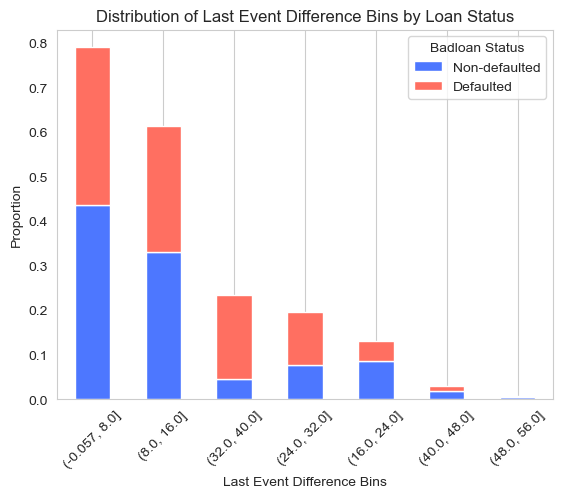

In [61]:
# Count frequencies of each bin by badloan status
bin_counts = df.groupby(['badloan', 'last_event_difference_bin']).size().unstack(fill_value=0)

# Normalize the counts to get proportions instead of absolute counts
bin_proportions = bin_counts.div(bin_counts.sum(axis=1), axis=0)

# Plot
plt.figure(figsize=(14, 7))
bin_proportions.T.plot(kind='bar', stacked=True, color=['#4D77FF', '#FF6F61'])
plt.title('Distribution of Last Event Difference Bins by Loan Status')
plt.xlabel('Last Event Difference Bins')
plt.ylabel('Proportion')
plt.legend(title='Badloan Status', labels=['Non-defaulted', 'Defaulted'])
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



##### Loan amount

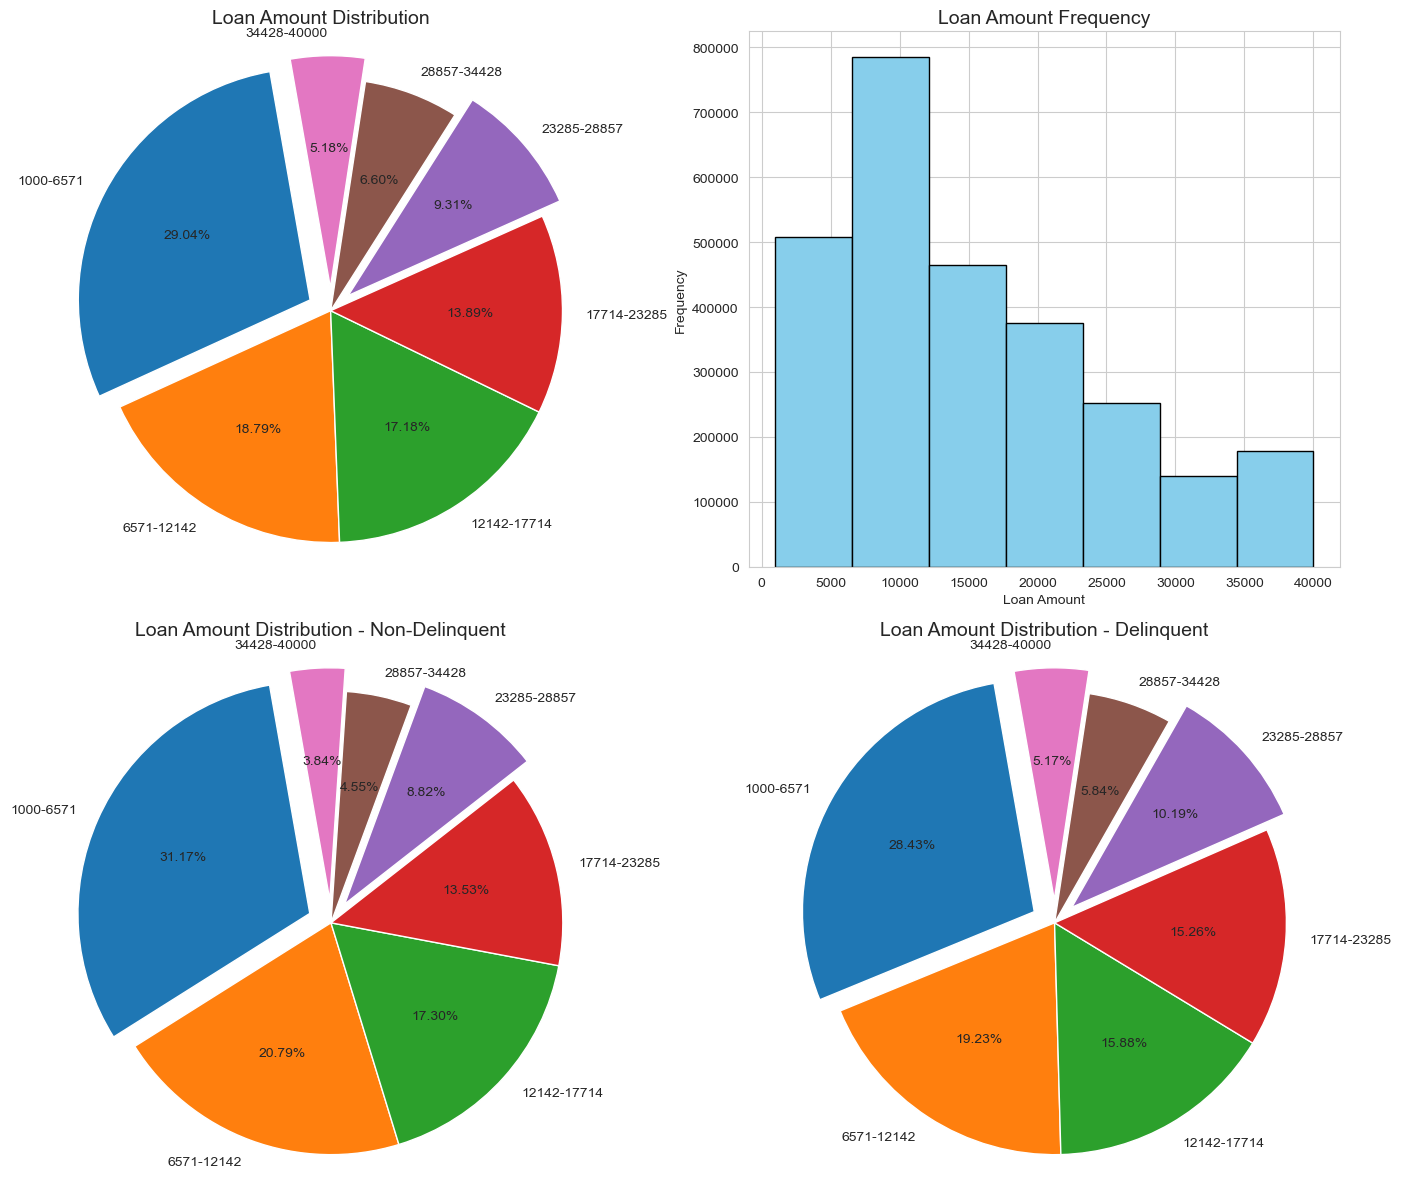

In [109]:
bin_edges = np.linspace(df['loan_amnt'].min(), df['loan_amnt'].max(), 8)  # Create 7 bins
bin_labels = [f'{int(bin_edges[i])}-{int(bin_edges[i+1])}' for i in range(len(bin_edges)-1)]

df['loan_amnt_bin'] = pd.cut(df['loan_amnt'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# figure for four subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

#colors = ['#FF9999', '#66B2FF', '#FFCC99', '#99FF99', '#FFCCCC', '#CCCCFF', '#FFDAB9']
explode = (0.1, 0, 0, 0, 0.1, 0, 0.1)  # Adjust this if the number of bins is different

axs[0, 0].pie(df['loan_amnt_bin'].value_counts(), labels=bin_labels, autopct='%.2f%%', explode=explode, startangle=100)
axs[0, 0].set_title('Loan Amount Distribution', fontsize=14)
axs[0, 0].axis('equal')

# Histogram for loan amounts
axs[0, 1].hist(df['loan_amnt'], bins=bin_edges, edgecolor='black', color='skyblue')
axs[0, 1].set_title('Loan Amount Frequency', fontsize=14)
axs[0, 1].set_xlabel('Loan Amount')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].grid(True)

# Pie chart for non-delinquent loans
axs[1, 0].pie(df[df['delinquent_target'] == 0]['loan_amnt_bin'].value_counts(), labels=bin_labels, autopct='%.2f%%', explode=explode, startangle=100)
axs[1, 0].set_title('Loan Amount Distribution - Non-Delinquent', fontsize=14)
axs[1, 0].axis('equal')

# Pie chart for delinquent loans
axs[1, 1].pie(df[df['delinquent_target'] == 1]['loan_amnt_bin'].value_counts(), labels=bin_labels, autopct='%.2f%%', explode=explode, startangle=100)
axs[1, 1].set_title('Loan Amount Distribution - Delinquent', fontsize=14)
axs[1, 1].axis('equal')

plt.tight_layout()
plt.show()


##### - term : Duration of the loan (36 | 60 months)

In [70]:
df['term_new'] = df['term'].replace({' 36 months': 36, ' 60 months': 60})
#df['term_new'] = df_fset1['term_new']
#df[['term_new']].head()

term_new
0        36
1        36
2        36
3        36
4        36

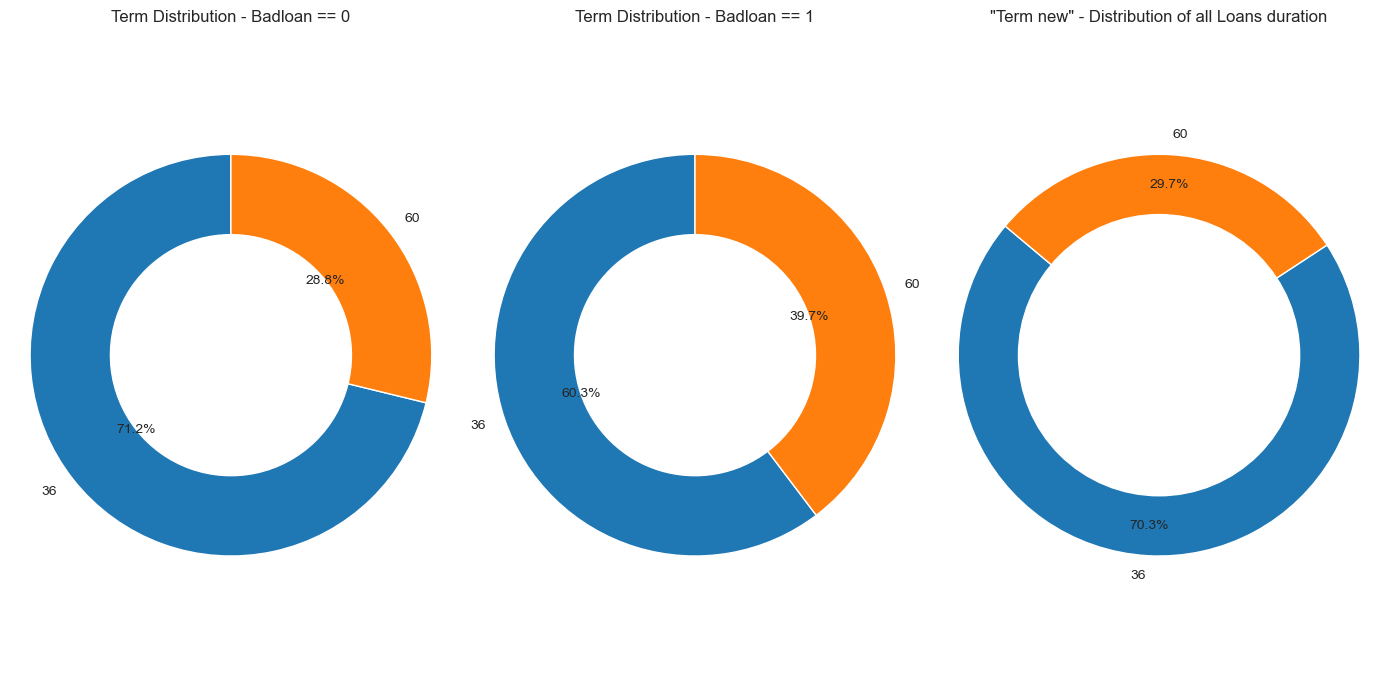

In [86]:
fig, axs = plt.subplots(1, 3, figsize=(14, 7))
centre_circle = plt.Circle((0,0),0.70,fc='white')

# Loop over the two badloan conditions
for i, badloan in enumerate([0, 1]):
    # Filter the data based on badloan status
    subset = df[df['badloan'] == badloan]
    
    # Counting the occurrences for each term
    term_counts = subset['term_new'].value_counts(normalize=True).sort_index()
    axs[i].fig = plt.gcf()

    wedges, texts, autotexts = axs[i].pie(term_counts, labels=term_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={"width": 0.4})
    
    # Title for each subplot
    axs[i].set_title(f'Term Distribution - Badloan == {badloan}')

    axs[i].axis('equal')

axs[2].pie(viz_counts.values, labels = viz_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)

axs[2].fig = plt.gcf()
axs[2].fig.gca().add_artist(centre_circle)

axs[2].axis('equal')


axs[2].set_title('"Term new" - Distribution of all Loans duration')
plt.tight_layout()

# Show the plot
plt.show()


- int_rate : Interest rate

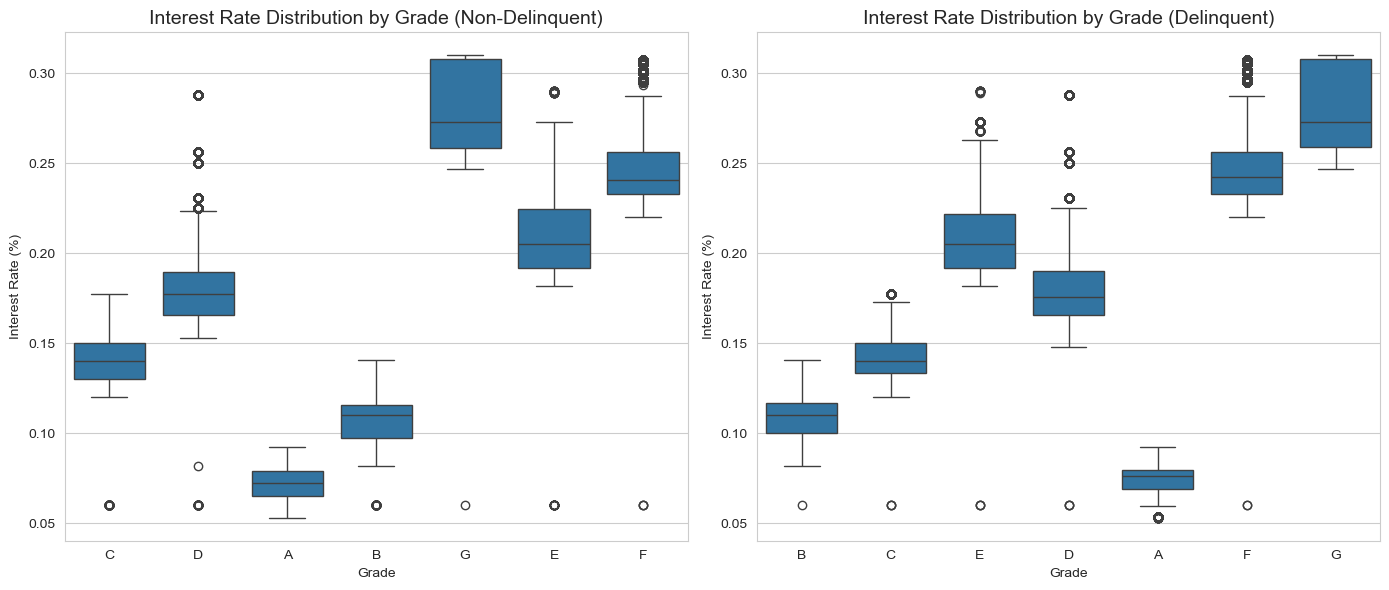

In [91]:
plt.figure(figsize=(14, 6)) 
# Subplot 1: For delinquent_target == 0
plt.subplot(1, 2, 1)  # (number of rows, number of columns, index of the subplot)
sns.boxplot(x='grade', y='int_rate', data=df[df['delinquent_target'] == 0])
plt.title("Interest Rate Distribution by Grade (Non-Delinquent)", fontsize=14)
plt.xlabel("Grade")
plt.ylabel("Interest Rate (%)")

# Subplot 2: For delinquent_target == 1
plt.subplot(1, 2, 2)  # Adjust subplot positioning
sns.boxplot(x='grade', y='int_rate', data=df[df['delinquent_target'] == 1])
plt.title("Interest Rate Distribution by Grade (Delinquent)", fontsize=14)
plt.xlabel("Grade")
plt.ylabel("Interest Rate (%)")

plt.tight_layout()
plt.show()


##### - application_type : Individual | Joint loan application

In [98]:
#Cleaning the 'application_type' column

# Convert values to lowercase
df['application_type'] = df['application_type'].str.lower()

# Mapping dictionary
mapping = {
    'individual': ['individual', 'direct_pay'],
    'joint': ['joint app', 'joint'],
}

# Replacing values using mapping dictionary in df.application_type
for category, values in mapping.items():
    df.loc[df['application_type'].isin(values), 'application_type'] = category

#df['application_type_ind'] = df['application_type']


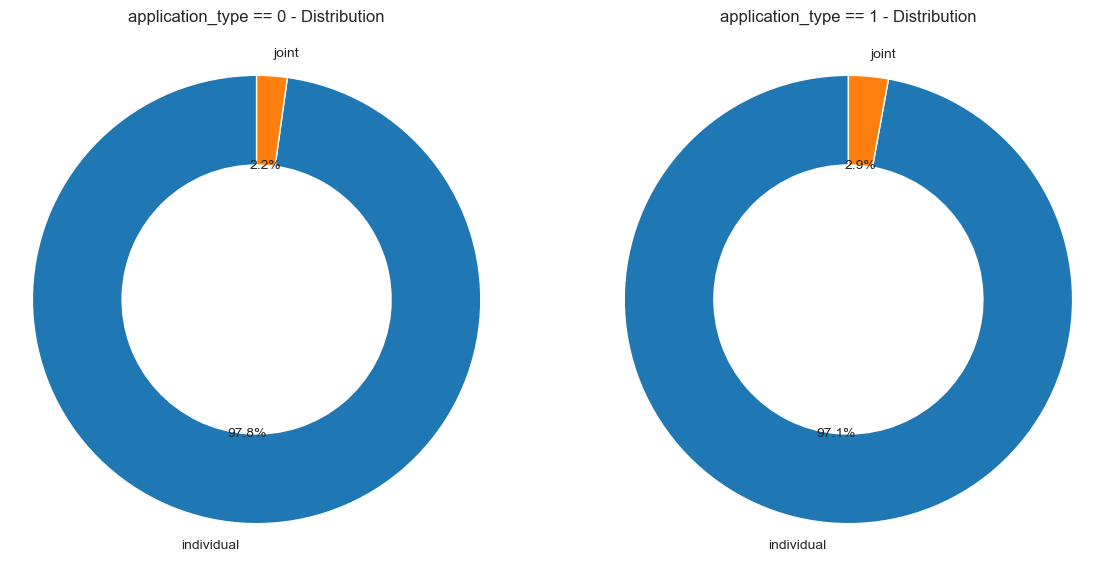

In [101]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
centre_circle = plt.Circle((0,0),0.70,fc='white')

for i, delinquency in enumerate([0, 1]):    
    subset = df[df['delinquent_target'] == delinquency]
    
    # Counting the occurrences for each term
    term_counts = subset['application_type'].value_counts(normalize=True).sort_index()
    axs[i].fig = plt.gcf()

    wedges, texts, autotexts = axs[i].pie(term_counts, labels=term_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={"width": 0.4})
    
    # Title for each subplot
    axs[i].set_title(f'application_type == {delinquency} - Distribution')

    axs[i].axis('equal')

#### Annual income

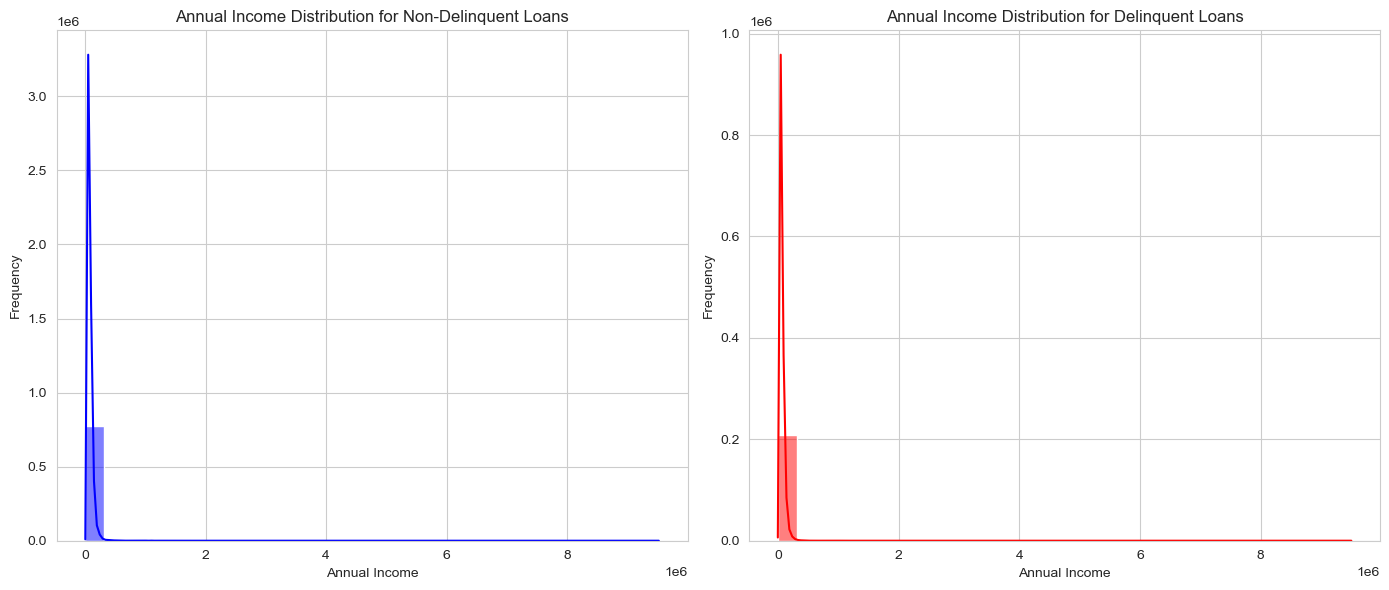

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and it contains 'annual_inc' and 'delinquent_target'

plt.figure(figsize=(14, 6))

# Subplot 1: Histogram for non-delinquent loans
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(df[df['delinquent_target'] == 0]['annual_inc'], bins=30, kde=True, color='blue')
plt.title('Annual Income Distribution for Non-Delinquent Loans')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')

# Subplot 2: Histogram for delinquent loans
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(df[df['delinquent_target'] == 1]['annual_inc'], bins=30, kde=True, color='red')
plt.title('Annual Income Distribution for Delinquent Loans')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


__From the Annual income plots, we can inder:__
- High Concentration at Lower Values: Both plots show a significant concentration of data near the origin, indicating that a majority of the borrowers have lower annual incomes.
- Scale and Spread: The income values spread across a broad range, extending up to $1,000,000 (1e6), but most of the data points fall within a much smaller range.
- Outliers and Skewness: The distribution appears to be right-skewed, with outliers extending towards higher incomes. These outliers can skew the mean and make the data hard to analyze using standard visualization techniques.

__To handle the skewness of the annual income distribution, we can apply a log transformation to the 'annual_inc' column.__:
Applying a log transformation (using np.log1p) can be very effective because:

- Reduces Skewness: It helps in reducing the skewness by spreading out the values that are clustered near the origin while bringing closer the extreme values
- Handles Zero and Negative Values: np.log1p(x) computes log(1 + x), which is defined for x >= -1, thus handling zero values which are common in financial datasets where some incomes might be zero.
- Improves Visualization: Data distributions are more interpretable and easier to visualize after applying a log transformation.

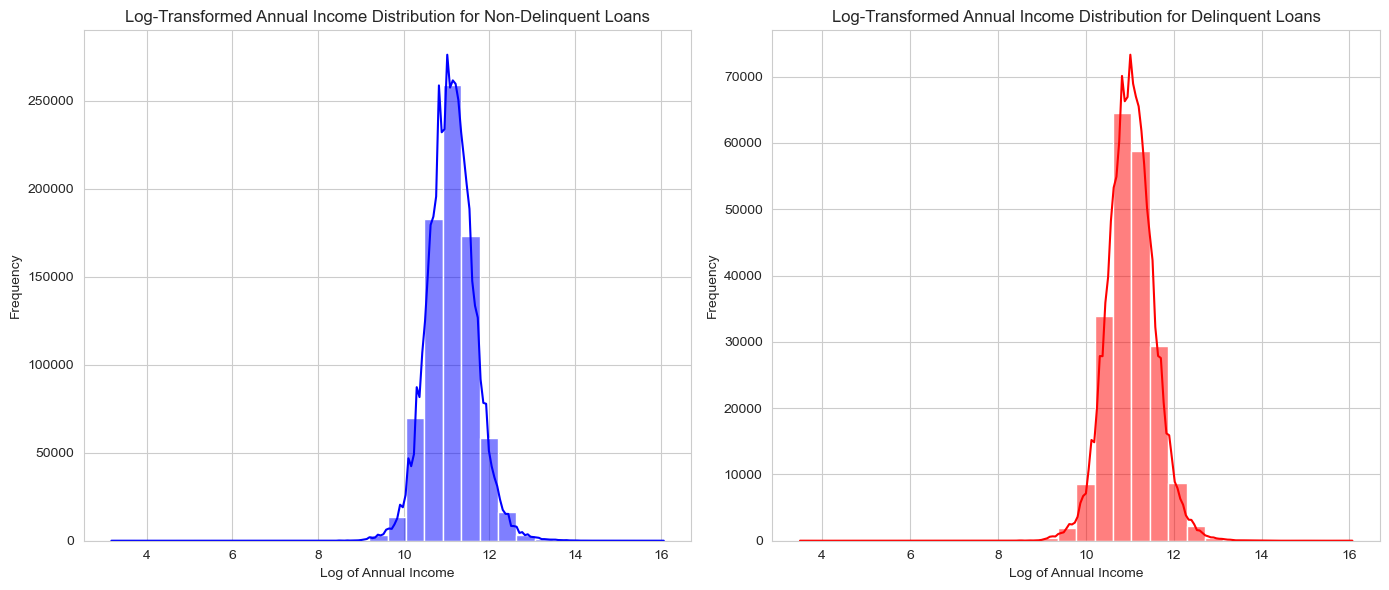

In [115]:
df['log_annual_inc'] = np.log1p(df['annual_inc'])

plt.figure(figsize=(14, 6))

# Subplot 1: Histogram for non-delinquent loans after log transformation
plt.subplot(1, 2, 1)
sns.histplot(df[df['delinquent_target'] == 0]['log_annual_inc'], bins=30, kde=True, color='blue')
plt.title('Log-Transformed Annual Income Distribution for Non-Delinquent Loans')
plt.xlabel('Log of Annual Income')
plt.ylabel('Frequency')

# Subplot 2: Histogram for delinquent loans after log transformation
plt.subplot(1, 2, 2)
sns.histplot(df[df['delinquent_target'] == 1]['log_annual_inc'], bins=30, kde=True, color='red')
plt.title('Log-Transformed Annual Income Distribution for Delinquent Loans')
plt.xlabel('Log of Annual Income')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#### State from which the loan was issued: 'addr_state'


In [ ]:
df['']

In [128]:
# necessary metrics by state
state_metrics = df.groupby('addr_state').agg({
    'annual_inc': 'mean',
    'loan_amnt': 'mean',
    'int_rate': 'mean',
    'delinquent_target': lambda x: (x == 1).mean() * 100  # percentage of delinquents
}).reset_index()
state_metrics.columns = ['State', 'Avg_Annual_Income', 'Avg_Loan_Amount', 'Avg_Interest_Rate', 'Delinquency_Rate']

# Converting all numeric columns to string for text display in Plotly
for col in state_metrics.columns[1:]: 
    state_metrics[col] = state_metrics[col].apply(lambda x: f"{x:.2f}")

color_scale = [[0.0, 'rgb(235, 246, 227)'], [0.2, 'rgb(216, 242, 188)'], [0.4, 'rgb(191, 239, 157)'],
               [0.6, 'rgb(159, 232, 115)'], [0.8, 'rgb(129, 214, 79)'], [1.0, 'rgb(86, 177, 47)']]

state_metrics['text_display'] = (
    state_metrics['State'] + '<br>' +
    'Average Loan Interest Rate: ' + state_metrics['Avg_Interest_Rate'] + '%' + '<br>' +
    'Average Annual Income: $' + state_metrics['Avg_Annual_Income'] + '<br>' +
    'Average Loan Amount: $' + state_metrics['Avg_Loan_Amount'] + '<br>' +
    'Delinquency Rate: ' + state_metrics['Delinquency_Rate'] + '%'
)

map_data = [dict(
        type='choropleth',
        colorscale=color_scale,
        autocolorscale=False,
        locations=state_metrics['State'],  
        z=state_metrics['Delinquency_Rate'].astype(float),
        locationmode='USA-states',
        text=state_metrics['text_display'],
        marker=dict(line=dict(color='rgb(255,255,255)', width=2)),
        colorbar=dict(title="USD")
    )]

# map
map_layout = dict(
    title='State-wise Lending Analysis<br>(Based on Various Financial Metrics)',
    geo=dict(
        scope='usa',
        projection=dict(type='albers usa'),
        showlakes=True,
        lakecolor='rgb(255, 255, 255)')
)

# Combining data + layout into figure
fig = dict(data=map_data, layout=map_layout)
iplot(fig, filename='state-lending-map')


0.0    0.789003
1.0    0.210997
Name: delinquent_target, dtype: float64

In [91]:
df.groupby('addr_state')['loan_status'].count()

addr_state
AK      6153
AL     32220
AR     20594
AZ     64831
CA    371748
CO     57106
CT     42932
DC      6066
DE      7738
FL    195852
GA     89113
HI     12547
IA         2
ID      6175
IL    108589
IN     46090
KS     22732
KY     26295
LA     30338
MA     61720
MD     64436
ME      6730
MI     70177
MN     46925
MO     43125
MS     15885
MT      7562
NC     75229
ND      4679
NE     10270
NH     13460
NJ     98565
NM     14313
NV     39250
NY    218567
OH     89720
OK     24805
OR     32580
PA     90510
RI     12070
SC     34071
SD      5458
TN     44219
TX    224734
UT     18013
VA     74323
VT      6028
WA     56448
WI     35743
WV     11103
WY      5591
Name: loan_status, dtype: int64

In [92]:
# Define the categories
good_categories = ['Current', 'Fully Paid', 'In Grace Period']

bad_categories = ['Charged Off', 'Default']

# Create a new column 'category' based on the conditions
df['loan_cat'] = df['loan_status'].apply(lambda x: 'good' if x in good_categories else ('bad' if x in bad_categories else 'late'))
#df['loan_cat'] = df['loan_cat']

/var/folders/9q/y31m_zrs5m3cz8zzkbtrtplm0000gn/T/ipykernel_1747/342376886.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
plt.figure(figsize=(12, 30))

plt.subplot(6, 2, 1)
sns.countplot(x='pub_rec', data=data, hue='loan_status')

plt.subplot(6, 2, 2)
sns.countplot(x='initial_list_status', data=data, hue='loan_status')

plt.subplot(6, 2, 3)
sns.countplot(x='application_type', data=data, hue='loan_status')

plt.subplot(6, 2, 4)
sns.countplot(x='mort_acc', data=data, hue='loan_status')

plt.subplot(6, 2, 5)
sns.countplot(x='pub_rec_bankruptcies', data=data, hue='loan_status')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


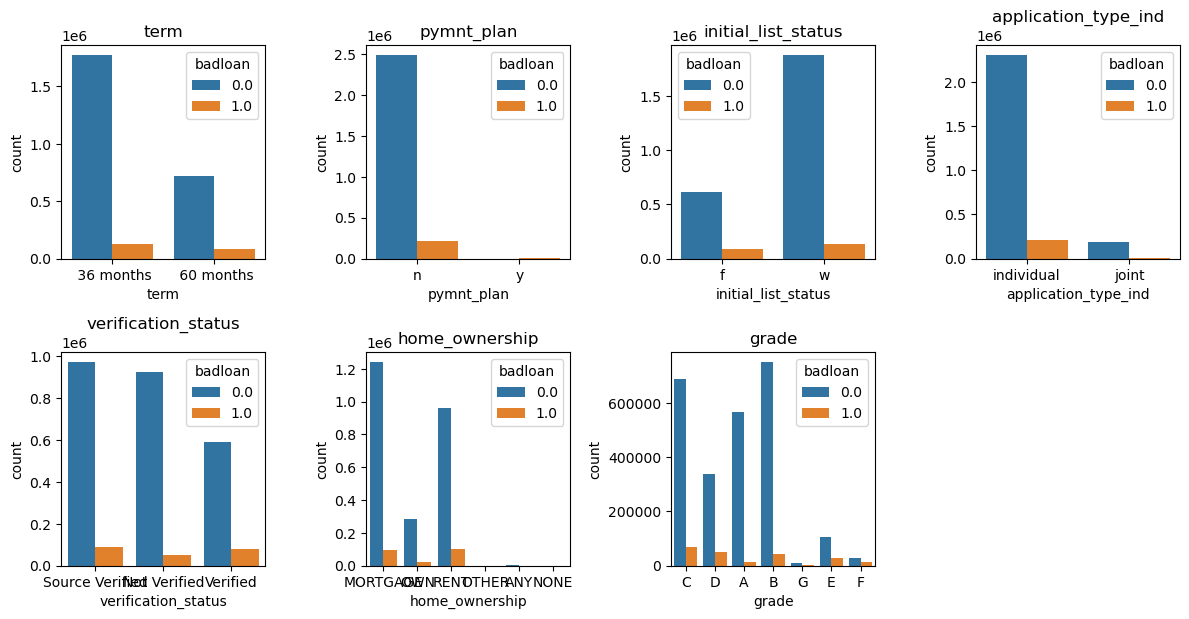

In [93]:
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

axes = axes.flatten()

# Iterate over each column and plot
for i, col in enumerate(['term', 'pymnt_plan', 'initial_list_status', 'application_type_ind',
                         'verification_status', 'home_ownership', 'grade',
                         'riskprem', 'inq_last_6mths', 'pub_rec_bankruptcies', 'emp_length',
                         'purpose']):
    ax = axes[i]
    if col == 'riskprem':
        sns.boxplot(x='badloan', y=col, data=df_fset1, ax=ax)
    else:
        sns.countplot(x=col, hue='badloan', data=df_fset1, ax=ax)
    ax.set_title(col)
    ax.legend(title='badloan')

# Remove empty subplots
if len(col) < len(axes):
    for j in range(len(col), len(axes)):
        fig.delaxes(axes[j])

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

In [94]:
#df_fset1.drop(['loan_status'], axis=1, inplace=True)

In [228]:
df['subregion'].unique

<bound method Series.unique of 0           Pacific
1           Pacific
2           Pacific
3           Pacific
4           Pacific
             ...   
2703425    Mountain
2703426    Mountain
2703427    Mountain
2703428    Mountain
2703429    Mountain
Name: subregion, Length: 2703430, dtype: object>

In [95]:
df['purpose'].value_counts()

# Education, renewable energy, wedding are the purposed that contains highest bad loans percent wise.

purpose_condition = round(pd.crosstab(df['loan_cat'], df['purpose']).apply(lambda x: x/x.sum() * 100), 2)

purpose_bad_loans = purpose_condition.values[0].tolist()
purpose_good_loans = purpose_condition.values[1].tolist()
purpose_late_loans = purpose_condition.values[2].tolist()


purpose = purpose_condition.columns

bad_plot = go.Bar(
    x=purpose,
    y=purpose_bad_loans,
    name = 'Bad Loans',
    text='%',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line = dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2
        )
    )
)

late_plot = go.Bar(
    x=purpose,
    y=purpose_late_loans,
    name='Late Loans',
    text='%',
    marker=dict(
        color='rgba(80, 100, 90, 0.7)',
        line = dict(
            color='rgba(80, 100, 90, 1)',
            width=2
        )
    )

)
good_plot = go.Bar(
    x=purpose,
    y=purpose_good_loans,
    name='Good Loans',
    text='%',
    marker=dict(
        color='rgba(50, 171, 96, 0.7)',
        line = dict(
            color='rgba(50, 171, 96, 1.0)',
            width=2
        )
    )
)

data = [bad_plot, late_plot, good_plot]

layout = go.Layout(
    title='Status of Loan by Purpose',
    xaxis=dict(
        title=''
    ),
    yaxis=dict(
        title='% of the Loan',
    ),
    paper_bgcolor='#FFF8DC',
    plot_bgcolor='#FFF8DC',
    showlegend=True
)

fig = dict(data=data, layout=layout)

# Display the figure
pyo.init_notebook_mode()
pyo.iplot(fig)


In [96]:
purpose_condition

purpose     car  credit_card  debt_consolidation  home_improvement  house  \
loan_cat                                                                    
bad        4.74         5.31                7.27              5.71   5.09   
good      94.13        93.56               91.24             92.87  93.00   
late       1.13         1.14                1.50              1.42   1.91   

purpose   major_purchase  medical  moving  other  renewable_energy  \
loan_cat                                                             
bad                 5.92     6.68     8.2   6.20              8.49   
good               92.53    91.57    89.9  92.12             89.51   
late                1.55     1.74     1.9   1.68              1.99   

purpose   small_business  vacation  wedding  
loan_cat                                     
bad                10.09      5.75    14.16  
good               87.74     92.73    85.84  
late                2.17      1.52     0.00

In [97]:
pd.crosstab(df['loan_status'], df['purpose']) # add .apply(lambda x: x/x.sum() * 100), 2) for percetange instead of count

purpose               car  credit_card  debt_consolidation  home_improvement  \
loan_status                                                                    
Charged Off          1243        34192              110563             10098   
Current             16678       421365              938754            112811   
Default                 2           25                  71                 9   
Fully Paid           7904       178840              440304             50533   
In Grace Period       139         3097                9954              1047   
Late (16-30 days)      70         1449                4307               555   
Late (31-120 days)    226         5889               18459              1955   

purpose             house  major_purchase  medical  moving   other  \
loan_status                                                          
Charged Off           909            3331     2155    1419   10051   
Current             12224           36018    20944   10427  106756   
Default                 0               2        2       0       9   
Fully Paid           4247           15716     8406    4991   41616   
In Grace Period       140             352      208     135    1168   
Late (16-30 days)      79             154       93      58     565   
Late (31-120 days)    263             719      470     270    2162   

purpose             renewable_energy  small_business  vacation  wedding  
loan_status                                                              
Charged Off                      132            2593      1073      125  
Current                          918           15970     11949       40  
Default                            0               2         0        0  
Fully Paid                       462            6354      5248      718  
In Grace Period                   11             246       118        0  
Late (16-30 days)                  4             120        56        0  
Late (31-120 days)                27             438       228        0

In [98]:
#INTEGRATE IMCOME CATEGORY from MOHAMED

# DATA WRANGLING

1. Cleaning & Preprocessing
2. Training
3. Evaluation

In [99]:
df = df.drop(df[(df['revol_util'].isna()) & df['revol_bal'] > 0].index)
df[(df['revol_util'].isna()) & (df['revol_bal'] > 0)].index
df.loc[df['revol_bal'] == 0, 'revol_util'] = 0
df.loc[df['num_tl_90g_dpd_24m'] == 0, 'num_tl_120dpd_2m'] = 0


In [102]:
for year in df.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{df[df.emp_length == year].badloan.value_counts(normalize=True)}")
    print('==========================================')

2 years years in this position:
badloan
0.0    0.920305
1.0    0.079695
Name: proportion, dtype: float64
1 year years in this position:
badloan
0.0    0.918492
1.0    0.081508
Name: proportion, dtype: float64
10+ years years in this position:
badloan
0.0    0.925279
1.0    0.074721
Name: proportion, dtype: float64
7 years years in this position:
badloan
0.0    0.909904
1.0    0.090096
Name: proportion, dtype: float64
4 years years in this position:
badloan
0.0    0.921715
1.0    0.078285
Name: proportion, dtype: float64
< 1 year years in this position:
badloan
0.0    0.922408
1.0    0.077592
Name: proportion, dtype: float64
8 years years in this position:
badloan
0.0    0.906668
1.0    0.093332
Name: proportion, dtype: float64
5 years years in this position:
badloan
0.0    0.92054
1.0    0.07946
Name: proportion, dtype: float64
9 years years in this position:
badloan
0.0    0.910203
1.0    0.089797
Name: proportion, dtype: float64
3 years years in this position:
badloan
0.0    0.919664

In [103]:
#df_fset1.emp_length.value_counts(normalize=True)
df_fset1['emp_length'].replace({'10+ years': 10, '< 1 year': 0.5, '1 year': 1, '2 years': 2,'3 years': 3, '4 years': 4, '5 years': 5, '6 years': 6,'7 years': 7,'8 years': 8,'9 years': 9, 'n/a': np.nan}, inplace=True)

# Regex in .str.extract('(\d+)'): This extracts any numeric characters from the strings, which simplifies converting them into integers.
# Handled manually instead of RegEx df_fset1['emp_length'] = df_fset1['emp_length'].str.extract('(\d+)').astype(float)

/var/folders/9q/y31m_zrs5m3cz8zzkbtrtplm0000gn/T/ipykernel_1747/2636083362.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/9q/y31m_zrs5m3cz8zzkbtrtplm0000gn/T/ipykernel_1747/2636083362.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [104]:
df_fset1.emp_length.value_counts(normalize=1, dropna=0)

emp_length
10.0    0.327434
0.5     0.091397
2.0     0.089150
3.0     0.079265
NaN     0.069552
1.0     0.065922
5.0     0.061639
4.0     0.059692
6.0     0.044315
7.0     0.039658
8.0     0.038879
9.0     0.033096
Name: proportion, dtype: float64

In [105]:
df_fset1.columns

Index(['badloan', 'loan_status', 'loan_amnt', 'funded_amnt', 'delinq_2yrs',
       'emp_length', 'home_ownership', 'annual_inc', 'inf', 'inf_6m',
       'initial_list_status', 'inq_last_6mths', 'inq_last_12m', 'int_rate',
       'internetuser', 'loan_vol', 'loan_vol6m', 'Muni', 'muni_6m',
       'muni_points', 'new_bus', 'new_bus_per', 'open_acc', 'open_acc_6m',
       'pct_tl_nvr_dlq', 'popestimate', 'pub_rec', 'pub_rec_bankruptcies',
       'pymnt_plan', 'grade', 'sub_grade', 'tax_liens', 'tot_hi_cred_lim',
       'application_type', 'unemployment', 'unem_rate', 'verification_status',
       'dti', 'purpose', 'term', 'earnings', 'gdpcontrib', 'rep', 'riskprem',
       'infUS', 'term_new', 'application_type_ind', 'loan_cat'],
      dtype='object')

In [106]:
df_fset1.home_ownership.value_counts(normalize=1, dropna=0)

home_ownership
MORTGAGE    0.492488
RENT        0.392259
OWN         0.113956
ANY         0.001263
NONE        0.000017
OTHER       0.000017
Name: proportion, dtype: float64

In [107]:
#Grouping  'ANY', 'NONE', 'OTHER' into 'OTHER' : rare categories
rare_categories = ['ANY', 'NONE', 'OTHER']
df_fset1['home_ownership'] = df_fset1['home_ownership'].replace(rare_categories, 'OTHER')


In [108]:
df_fset1.home_ownership.value_counts(normalize=1, dropna=0)

home_ownership
MORTGAGE    0.492488
RENT        0.392259
OWN         0.113956
OTHER       0.001297
Name: proportion, dtype: float64

## S2 Verification EDA

##### MANIPULATIONS TO BE BETTER UNDERSTAND THE DATA AND EVALUATE WHETHER WE CAN RE-CREATE

In [110]:
# Function to calculate the recoveries - based on features
def calculate_reco(row):
    amount = row['loan_amnt']
    length_payment = row['month_difference']
    compounded_rate = row['int_rate'] / 12
    return amount * (1 + compounded_rate) ** length_payment


# Applying the calculate_reco function to each row of the DataFrame
df['calculated_recoveries'] = df.apply(calculate_reco, axis=1)

In [112]:
list_1 = ["loan_amnt", 'loan_status_', "grade", "term", 'int_rate', 'installment', 'issue_daily','last_date', 'month_difference', 'next_pymnt_d', 'recoveries', 'out_prncp', 'revol_bal', 'revol_util' ,'purpose', 'total_pymnt', 'num_il_tl', 'open_act_il', 'num_tl_120dpd_2m']
df['calculated_paymnt'] = ((df['installment'] * (df['month_difference']-1)) - df.total_pymnt) / df.total_pymnt
df[(df['loan_status_'].isin(['Charged Off', 'Default'])) & df['out_prncp'] > 0][list_1].sort_values(by='month_difference', ascending=1).head(50)

loan_amnt loan_status_ grade        term  int_rate  installment  \
2270567      24000      Default     A   36 months    0.0881   761.080017   
844425       24000      Default     B   36 months    0.1139   790.169983   
550420       12000      Default     B   60 months    0.1171   265.179993   
286650       15100      Default     E   36 months    0.2274   582.479980   
288688       16000      Default     B   36 months    0.1144   527.159973   
289527        3600      Default     B   36 months    0.1149   118.699997   
2252584      20000      Default     E   36 months    0.2485   793.619995   
1308805      14975      Default     E   36 months    0.2449   591.380005   
2545605      18000      Default     D   60 months    0.1999   476.790009   
2360756      30000      Default     D   60 months    0.1899   778.059998   
1040611      21000      Default     F   60 months    0.2749   647.409973   
1452712       1000      Default     C   36 months    0.1614    35.230000   
1129343      12000      Default     C   60 months    0.1399   279.160004   
1039945      40000      Default     B   60 months    0.1099   869.500000   
271366       30000      Default     D   60 months    0.2149   819.900024   
953847        6400      Default     B   36 months    0.0839   201.710007   
2119568      16800      Default     D   36 months    0.1629   593.049988   
953038        4200      Default     D   36 months    0.1825   152.369995   
953385        6000      Default     C   36 months    0.1299   202.139999   
678217       20175      Default     D   36 months    0.1999   749.679993   
1971598      35000      Default     C   36 months    0.1199  1162.339966   
1038514      30300      Default     G   60 months    0.2996   979.570007   
1306067      25000      Default     C   36 months    0.1367   850.440002   
1798037      25000      Default     C   36 months    0.1367   850.440002   
45848        28650      Default     E   60 months    0.2099   774.919983   
2352886      29000      Default     F   60 months    0.2511   853.059998   
2392574      10000      Default     D   60 months    0.1903   259.579987   
2398994       8800      Default     C   36 months    0.1505   305.279999   
2616204       8000      Default     C   36 months    0.1299   269.519989   
2468722      21275      Default     C   60 months    0.1557   512.520020   
82177        10000      Default     D   36 months    0.1727   357.880005   
1602925      16000      Default     F   60 months    0.2499   469.529999   
712161       21000      Default     G   60 months    0.3089   690.950012   
2346678      30000      Default     B   36 months    0.0916   956.229980   
948814       24000      Default     D   36 months    0.1899   879.630005   
2410385      10000      Default     B   36 months    0.0944   320.049988   
1505771      32000      Default     D   60 months    0.2145   873.830017   
837043        4000      Default     D   36 months    0.1899   146.610001   
674897       10000      Default     E   36 months    0.2332   388.769989   
1792653      11900      Default     A   36 months    0.0789   372.299988   
2179534      15000      Default     E   60 months    0.2245   418.140015   
1805781       3000      Default     D   36 months    0.1999   111.480003   
2541099      17600      Default     B   60 months    0.1075   380.480011   
2502466      11500      Default     F   36 months    0.2657   466.850006   
2348563      22075      Default     G   36 months    0.2734   905.250000   
2348508      34000      Default     B   36 months    0.0975  1093.099976   
2345562      19000      Default     G   36 months    0.2814   787.349976   
2344143      35000      Default     D   36 months    0.1825  1269.729980   
1793757       4000      Default     D   36 months    0.1727   143.149994   
2343812      24000      Default     B   60 months    0.0975   506.989990   

        issue_daily  last_date  month_difference next_pymnt_d  recoveries  \
2270567  2019-11-01 2019-11-01                 0       

In [113]:
df[(df['loan_status_'].isin(['Charged Off', 'Default']))][list_1]

loan_amnt loan_status_ grade        term  int_rate  installment  \
3            19600  Charged Off     B   36 months    0.1409   670.739990   
4             3900  Charged Off     B   36 months    0.1311   131.619995   
6            10000  Charged Off     C   36 months    0.1580   350.589996   
37           18400  Charged Off     E   60 months    0.2100   497.790009   
38            6575  Charged Off     B   36 months    0.1311   221.889999   
...            ...          ...   ...         ...       ...          ...   
2702813      11000  Charged Off     C   36 months    0.1719   393.230011   
2702871      35000  Charged Off     B   36 months    0.1102  1146.189941   
2703023      22925  Charged Off     C   60 months    0.1612   558.960022   
2703055      16000  Charged Off     B   60 months    0.1308   364.709991   
2703243      18000  Charged Off     C   60 months    0.1430   421.640015   

        issue_daily  last_date  month_difference next_pymnt_d    recoveries  \
3        2012-09-01 2014-01-01                16                1759.329956   
4        2012-09-01 2014-06-01                21                 315.149994   
6        2012-09-01 2014-12-01                27                4624.319824   
37       2012-11-01 2013-07-01                 8                1049.810059   
38       2012-11-01 2014-05-01                18                 513.640015   
...             ...        ...               ...          ...           ...   
2702813  2019-05-01 2019-10-01                 5                   0.000000   
2702871  2019-06-01 2019-08-01                 2               13979.250000   
2703023  2019-08-01 2019-11-01                 3                   0.000000   
2703055  2019-08-01 2019-12-01                 4                   0.000000   
2703243  2019-10-01 2020-03-01                 5                   0.000000   

         out_prncp  revol_bal  revol_util             purpose   total_pymnt  \
3              0.0       2626       0.559      major_purchase  11801.530273   
4              0.0       5633       0.828  debt_consolidation   2582.010010   
6              0.0       6413       0.723  debt_consolidation  12534.219727   
37             0.0      18101       0.673  debt_consolidation   5022.370117   
38             0.0      12965       0.757         credit_card   4498.060059   
...            ...        ...         ...                 ...           ...   
2702813        0.0      10633       0.879  debt_consolidation   1955.650024   
2702871        0.0       5837       0.132  debt_consolidation  16250.200195   
2703023        0.0      13335       0.988  debt_consolidation   1635.819946   
2703055        0.0      17407       0.747  debt_consolidation   1082.500000   
2703243        0.0        190       0.030  debt_consolidation   1672.260010   

         num_il_tl  open_act_il  num_tl_120dpd_2m  
3                1          NaN               0.0  
4                1          NaN               0.0  
6                9          NaN               0.0  
37               5          NaN               0.0  
38               6          NaN               0.0  
...            ...          ...               ...  
2702813         11          2.0               0.0  
2702871         11          2.0               0.0  
2703023         16          7.0               0.0  
2703055          8          4.0               0.0  
2703243          5          2.0               0.0  

[177993 rows x 19 columns]

In [114]:
df[(df['loan_status_'].isin(['Charged Off'])) & (df['out_prncp'] != 0 )][list_1]

Empty DataFrame
Columns: [loan_amnt, loan_status_, grade, term, int_rate, installment, issue_daily, last_date, month_difference, next_pymnt_d, recoveries, out_prncp, revol_bal, revol_util, purpose, total_pymnt, num_il_tl, open_act_il, num_tl_120dpd_2m]
Index: []

In [115]:
list_2 = ["loan_amnt", 'badloan', "grade", "term_new", 'int_rate', 'installment', 'issue_daily','last_date', 'last_date_issue_difference', 'recoveries', 'out_prncp', 'revol_bal', 'revol_util', 'total_pymnt', 'num_op_rev_tl', 'num_tl_120dpd_2m', 'infUS', 'labor_force', 'logearnings', 'logunemployment', 'muni_6m', 'popestimate' ] #purpose, 'open_act_il',
df_selected = df[list_2].iloc[:100000]
df_selected = df_selected.dropna()
info_col(df_selected)

Data type  Number of unique values  Missing values
loan_amnt                  int32                     1445             0.0
badloan                  float32                        2             0.0
grade                     object                        7             0.0
term_new                   int64                        2             0.0
int_rate                 float64                      374             0.0
installment              float32                    28770             0.0
issue_daily       datetime64[ns]                       89             0.0
last_date         datetime64[ns]                       95             0.0
month_difference           int64                       57             0.0
recoveries               float32                     5191             0.0
out_prncp                float32                    45899             0.0
revol_bal                  int32                    35488             0.0
revol_util               float64                     1080             0.0
total_pymnt              float32                    89321             0.0
num_op_rev_tl               int8                       52             0.0
num_tl_120dpd_2m         float64                        3             0.0
infUS                    float32                       95             0.0
labor_force              float32                      272             0.0
logearnings              float32                      274             0.0
logunemployment          float32                      273             0.0
muni_6m                  float32                       95             0.0
popestimate              float64                       23             0.0

REFERENCES:

[1] H. Kim, H. Cho, D. Ryu, An empirical study on credit card loan delinquency, Econ. Syst. 42 (Vol. 3) (2018) 437–449.